In [198]:
# Add Matplotlib inline magic command
%matplotlib inline

In [199]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import os
import statistics
import matplotlib as mpl

In [200]:
# CSV files (city_data)
PyBer_city_data = os.path.join('..', 'PyBer_Analysis', 'Resources', 'city_data.csv')
city_data_df = pd.read_csv(PyBer_city_data, encoding = "UTF-8")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [201]:
# CSV files (ride_data)
PyBer_ride_data = os.path.join('..', 'PyBer_Analysis', 'Resources', 'ride_data.csv')
ride_data_df = pd.read_csv(PyBer_ride_data, encoding = "UTF-8")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178
4,South Jack,06/03/2019 04:28,34.58,3908451377344
5,South Latoya,11/03/2019 12:26,9.52,1994999424437
6,New Paulville,27/02/2019 11:17,43.25,793208410091
7,Simpsonburgh,26/04/2019 00:43,35.98,111953927754
8,South Karenland,08/01/2019 03:28,35.09,7995623208694
9,North Jasmine,09/03/2019 06:26,42.81,5327642267789


# Inspecting the data in both files

In [202]:
## Inspect the city_data 

# Check for null values
city_data_df.isnull()
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [203]:
# Check if driver_count column has an integer data type
city_data_df['driver_count']
city_data_df.count()

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [204]:
# Find out how many data points there are for each type of city
type_city_count = city_data_df.groupby(by = "type").count()
type_city_count.loc[:,["driver_count"]].sort_values("driver_count")

,driver_count
type,
Rural,18
Suburban,36
Urban,66


In [205]:
## Inspect the ride_data 

# Get all the rows that contain null values
ride_data_df.isnull()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [206]:
# Make sure the fare and ride_id columns are numerical data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge DataFrames

In [207]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3908451377344,46,Urban


# Create Bubble Chart

In [208]:
## Create a DataFrame for each city type

In [209]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,14/01/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,04/03/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,24/02/2019 04:29,33.44,2005065760003,57,Urban
3,Rodneyfort,10/02/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,06/03/2019 04:28,34.58,3908451377344,46,Urban


In [210]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,13/04/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,02/02/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,27/03/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,23/02/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,06/05/2019 08:57,51.80,4018025271936,2,Rural


In [211]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,27/01/2019 03:08,27.79,6653622887913,11,Suburban
1626,East Kentstad,07/04/2019 19:44,18.75,6575961095852,20,Suburban
1627,Lake Omar,17/01/2019 21:33,21.71,966911700371,22,Suburban
1628,Myersshire,27/02/2019 17:38,17.10,5706770909868,19,Suburban
1629,West Hannah,19/04/2019 01:06,37.78,2273047151891,12,Suburban


In [212]:
## Total number of rides for each city type

In [213]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(by ="city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [214]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(by ="city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [215]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(by ="city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [216]:
## Average fare for ecah city type

In [217]:
# Find the average fare for urban cities
avg_urban_fare = urban_cities_df.groupby(by = "city").mean()["fare"]
avg_urban_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [218]:
# Find the average fare for rural cities
avg_rural_fare = rural_cities_df.groupby(by = "city").mean()["fare"]
avg_rural_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [219]:
# Find the average fare for suburban cities
avg_suburban_fare = suburban_cities_df.groupby(by = "city").mean()["fare"]
avg_suburban_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [220]:
## Get the average number of drivers for each city

In [221]:
# Get the total number of rides for urban 
urban_driver_count = urban_cities_df.groupby(by = "city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [222]:
# Get the total number of rides for rural 
rural_driver_count = rural_cities_df.groupby(by = "city").mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [223]:
# Get the total number of rides for suburban 
suburban_driver_count = suburban_cities_df.groupby(by = "city").mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [224]:
## Create the scatter plots for each type of city

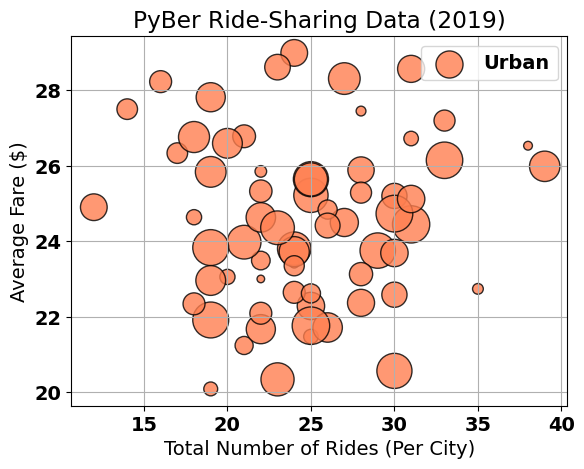

In [225]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, avg_urban_fare, s=10*urban_driver_count, alpha=0.80, color="coral", edgecolors= "black", linewidth=1, label= "Urban")

# Add title and axis labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

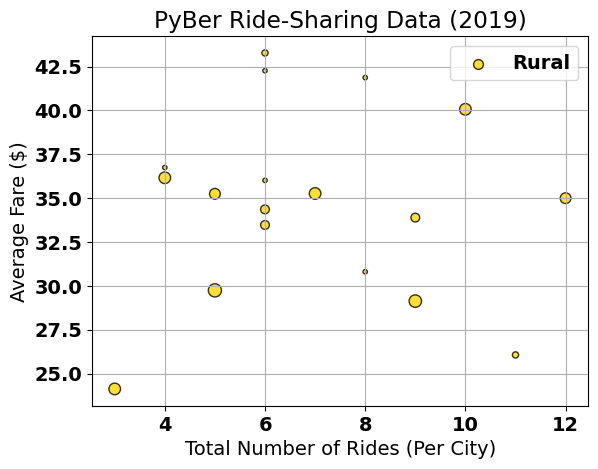

In [226]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, avg_rural_fare, s=10*rural_driver_count, alpha=0.80, color="gold", edgecolors= "black", linewidth=1, label= "Rural")

# Add title and axis labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

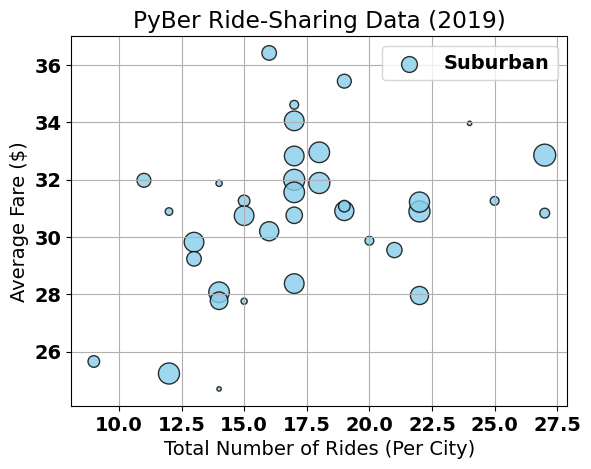

In [227]:
# Build the scatter plots for rural cities.
plt.scatter(suburban_ride_count, avg_suburban_fare, s=10*suburban_driver_count, alpha=0.80, color="skyblue", edgecolors= "black", linewidth=1, label= "Suburban")

# Add title and axis labels
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid
plt.grid(True)

# Add legend
plt.legend()

In [228]:
## Create a bubble chart for all cities (combine these three charts into one chart)

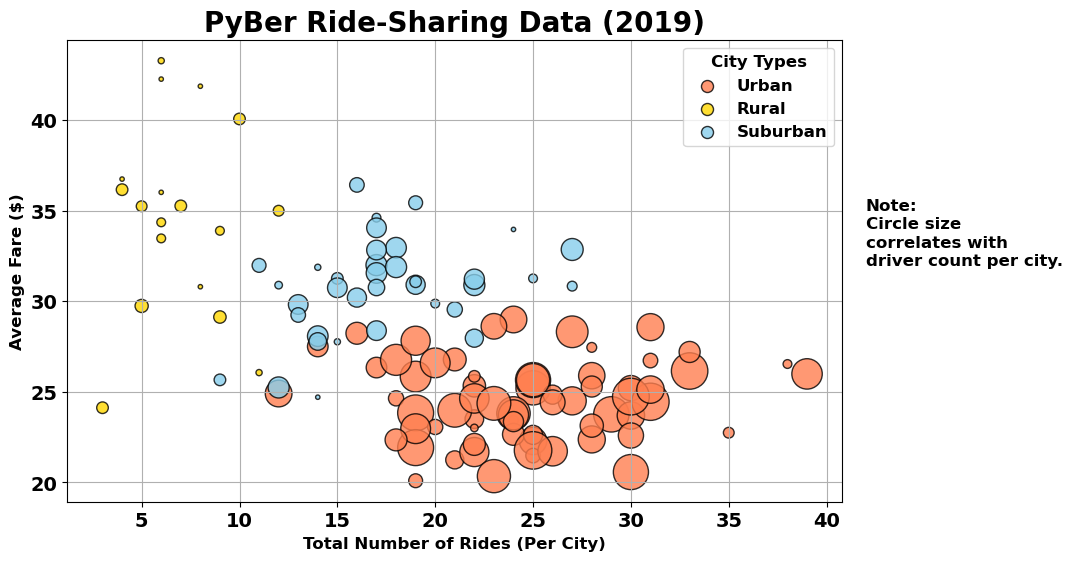

In [229]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, avg_urban_fare, s=10*urban_driver_count, alpha=0.80, color="coral", edgecolors= "black", linewidth=1, label= "Urban")

plt.scatter(rural_ride_count, avg_rural_fare, s=10*rural_driver_count, alpha=0.80, color="gold", edgecolors= "black", linewidth=1, label= "Rural")

plt.scatter(suburban_ride_count, avg_suburban_fare, s=10*suburban_driver_count, alpha=0.80, color="skyblue", edgecolors= "black", linewidth=1, label= "Suburban")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20, weight='bold')
plt.ylabel("Average Fare ($)", fontsize=12, weight='bold')
plt.xlabel("Total Number of Rides (Per City)", fontsize=12, weight='bold')
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:", fontsize="12", weight='bold')
plt.text(42, 34, "Circle size", fontsize="12")
plt.text(42, 33, "correlates with", fontsize="12")
plt.text(42, 32, "driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()

# Summary statistics for Number of Riders by City Type

In [230]:
## Get summary statistics for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [231]:
## Get summary statistics for rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [232]:
## Get summary statistics for suburban cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [233]:
## Get summary statistics of the ride count for each city type

In [234]:
# Summary statistics for urban_ride_count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [235]:
# Summary statistics for rural_ride_count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [236]:
# Summary statistics for suburban_ride_count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [237]:
## Get Statistics using Pandas mean(), median(), and mode() Methods

In [238]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [239]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [240]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [241]:
# Calculate the mode of the ride count for the rural cities.
rural_ride_count.mode()

0    6
Name: ride_id, dtype: int64

In [242]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
Name: ride_id, dtype: int64

In [243]:
## Getting statistics using NumPy mean() and median() Functions and SciPy mode() Function

In [244]:
# Getting mean, median, and mode for the ride counts (Urban cities)
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [245]:
# Getting mean, median, and mode for the ride counts (Rural cities)
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [246]:
# Getting mean, median, and mode for the ride counts (Subrban cities)
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


# Summary Statistics for the Fare by City Type

In [247]:
## Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [248]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [249]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [250]:
## Get the mean, median, and mode for all the city types
# For mean and median: NumPy functions
# For mode: SciPy statistics mode function

In [251]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [252]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [253]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


# Summary Statistics for the Number of Drivers by City Type

In [254]:
## Create a Series for each city type based on the driver_count column in each city type DataFrame

In [255]:
# # Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [256]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [257]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [258]:
## Calculate the measures of central tendency for the number of drivers by city type

In [259]:
# Calculate the measures of central tendency for the number of drivers in urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the number of urban drivers is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the number of urban drivers is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the number of urban drivers is {mode_urban_drivers}.")

The mean for the number of urban drivers is 36.68.
The median for the number of urban drivers is 37.00.
The mode for the number of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [260]:
# Calculate the measures of central tendency for the number of drivers in rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the number of rural drivers is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for the number of rural drivers is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the number of rural drivers is {mode_rural_drivers}.")

The mean for the number of rural drivers is 4.30.
The median for the number of rural drivers is 4.00.
The mode for the number of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [261]:
# Calculate the measures of central tendency for the number of drivers in suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the number of suburban drivers is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the number of suburban drivers is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the number of suburban drivers is {mode_suburban_drivers}.")

The mean for the number of suburban drivers is 13.71.
The median for the number of suburban drivers is 16.00.
The mode for the number of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


# Box-and-Whisker Plots for Ride Count Data

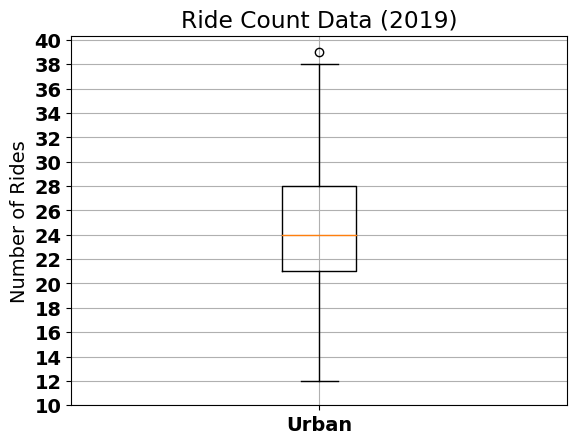

In [262]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

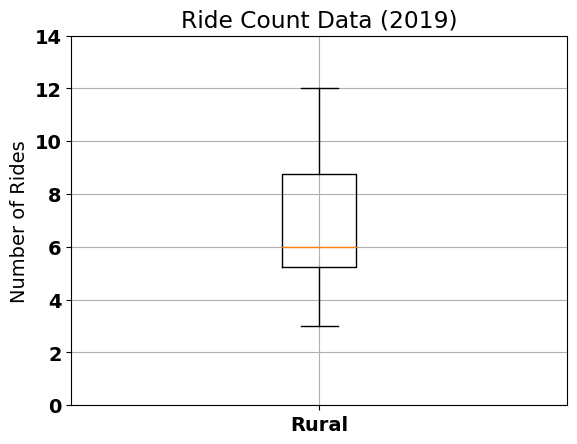

In [263]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

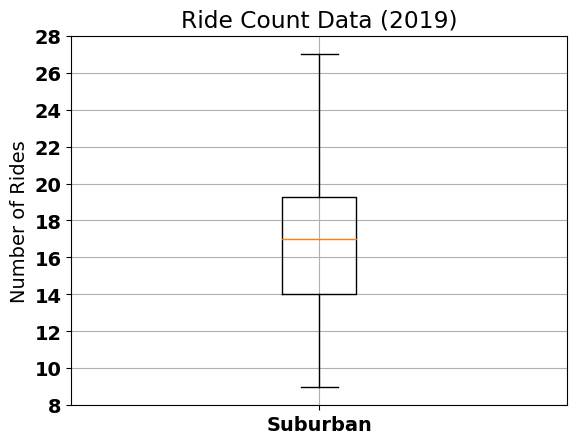

In [264]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 30, step=2.0))
ax.grid()
plt.show()

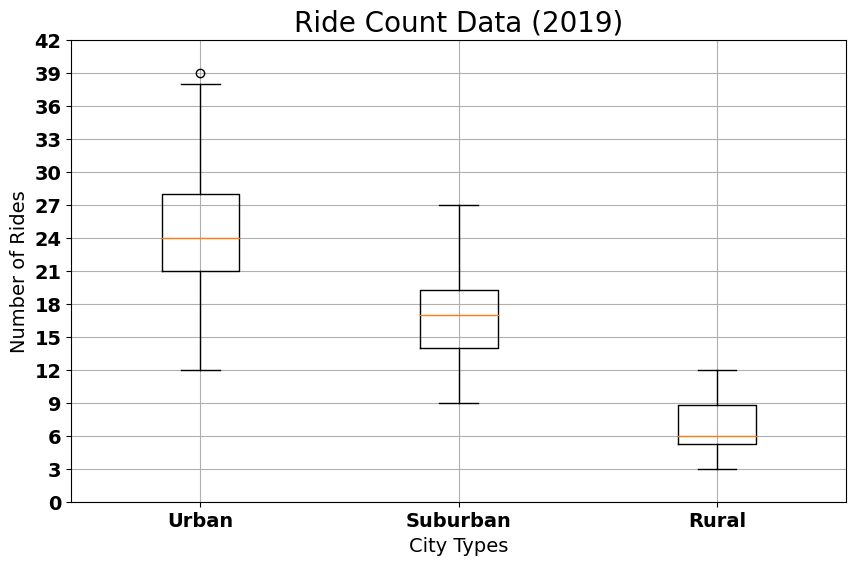

In [265]:
## Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [266]:
## find out which city has the highest rider count
# We know that the outlier for the urban_ride_count is 39
# We can get all the "True" values where the urban_ride_count equals 39
# Then, we can filter the urban_ride_count Series for all the "True" values and get the city name from the index

# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Box-and-Whisker Plots for Ride Fare Data

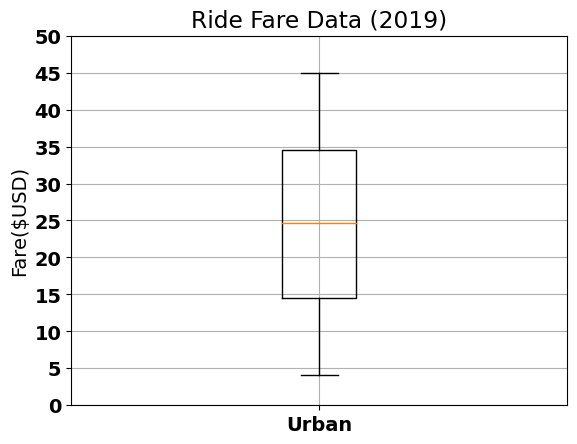

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [267]:
# # Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

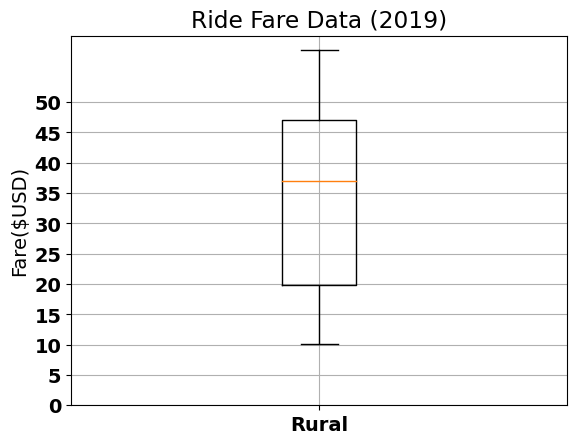

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [268]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

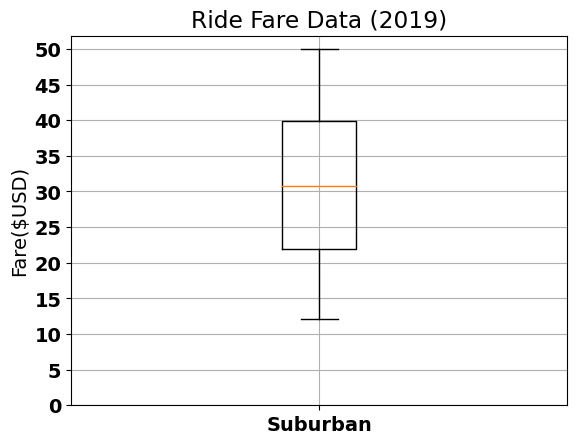

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [269]:
# # Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

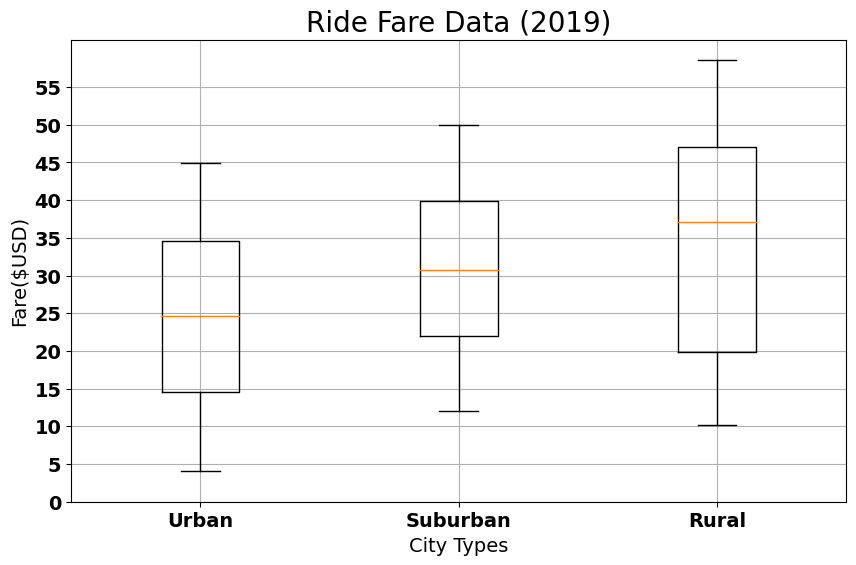

In [270]:
## Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

# Box-and-Whisker Plots for Driver Count Data

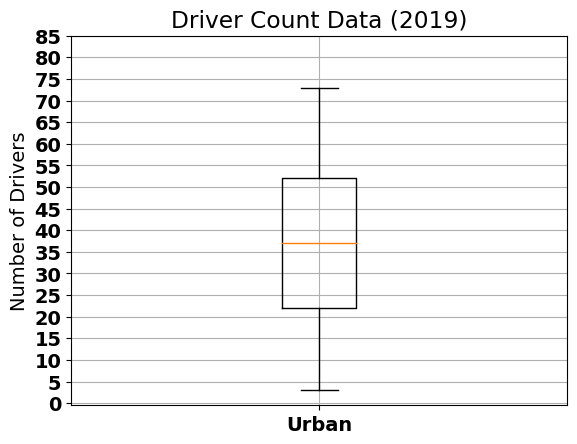

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [271]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

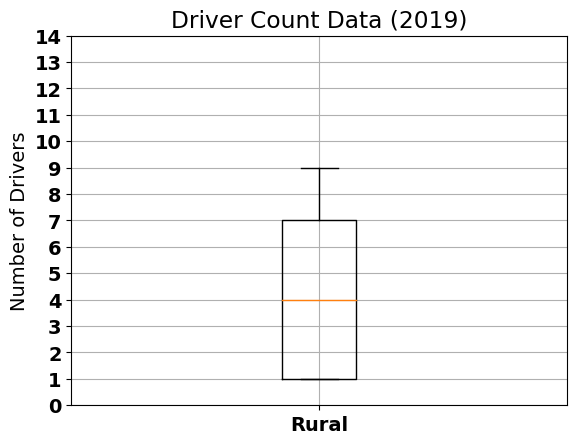

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [272]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 15, step=1.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

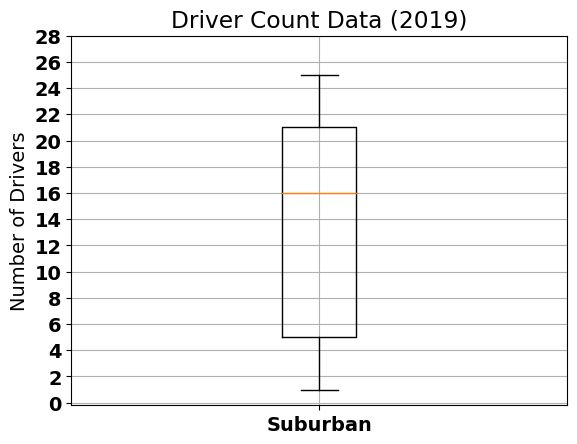

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [273]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

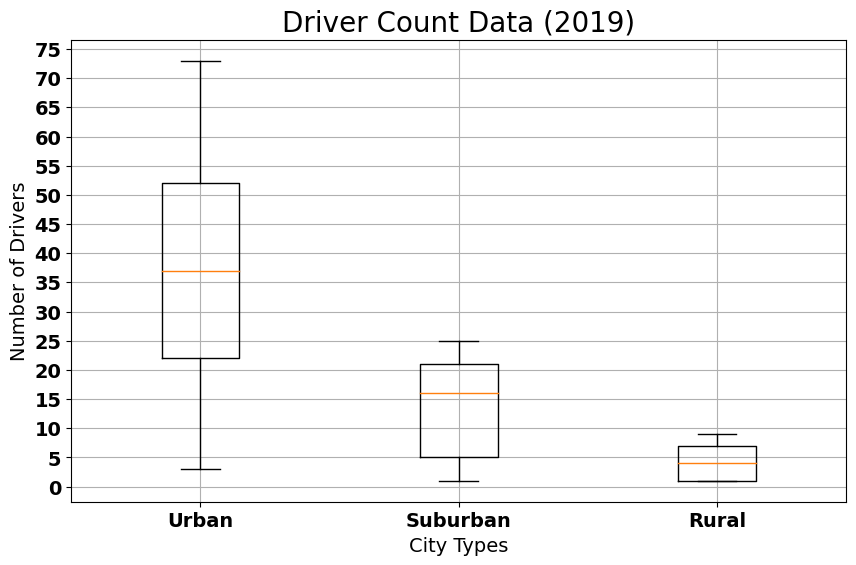

In [274]:
## Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

# Percentage of Total Fares by City Type

In [275]:
## Get the total fares for each city type

In [276]:
## Get the sum of the fares for each city type.

# create a Series where the index is the type of city on the pyber_data_df DataFrame 
# and the column is the sum of the fares for city type (with groupby(column))
# Apply the sum() method on the fare column to get the Series with the total number of fares for each city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [277]:
## Get the total for all the fares for all the city types
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [278]:
## Calculate the percentage of fare for each city type. 
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [279]:
## Calculate the percentage of fare for each city type. (In one line)
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

# Pie Chart for the Percentage of Fares by City Type

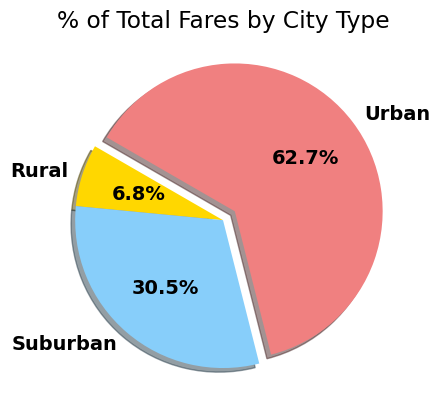

In [280]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)

# Add title
plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()

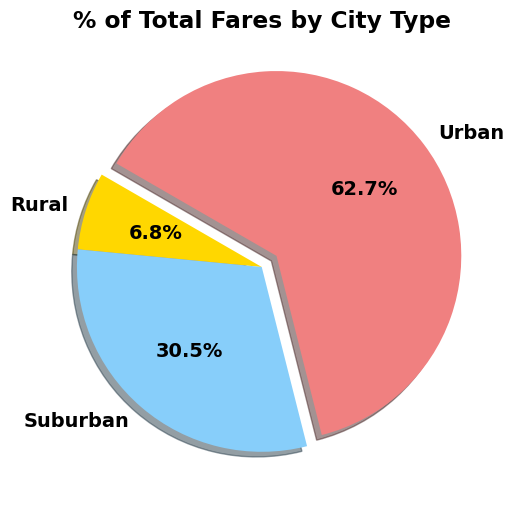

In [281]:
# Build Pie Chart with rcParams (matplotlib as mpl)
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type", weight='bold')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight']= 'bold'

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

# Calculate Ride Percentages

In [282]:
## Get the total number of rides for each city type

In [283]:
# create a Series of data where the index is the type of city
#and the column for the Series is the number of the rides for the type of city (groupby(columns))
pyber_data_df.groupby(["type"])

In [284]:
# Apply the count() function on the ride_id column to get the Series with the total number of rides for each city type
pyber_data_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [285]:
## Get the total rides for all the city types

In [286]:
# Get the number of total rides using the count() function on the ride_id column on the pyber_data_df DataFrame
pyber_data_df["ride_id"].count()

2375

In [287]:
## Calculate the percentage of the total rides for each city type

In [288]:
# Divide the total number of rides for each city type by the total rides for all the cities and divide by 100
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

# Pie Chart for Percentage of Rides by City Type

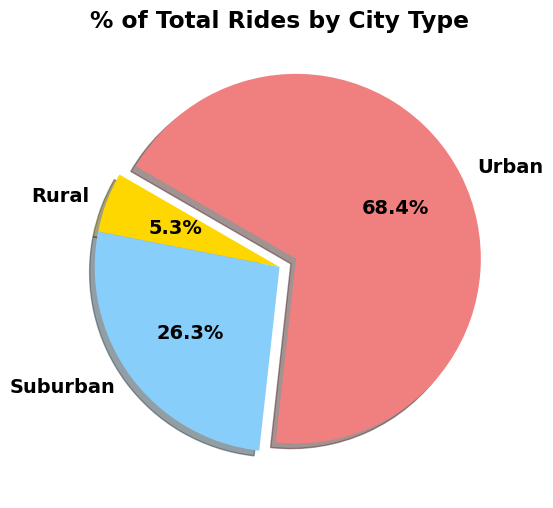

In [289]:
# Build Pie Chart with rcParams (matplotlib as mpl)
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type", weight='bold')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight']= 'bold'

# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

# Calculate Driver Percentages

In [290]:
## Get the total number of drivers for each city type
city_data_df.groupby(["type"]).sum()["driver_count"]

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [291]:
## Get the total drivers for all the city types
city_data_df["driver_count"].sum()

2973

In [293]:
## Calculate the percentage of the total drivers for each city type
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

# Pie Chart for the Percentage of Drivers for Each City Type

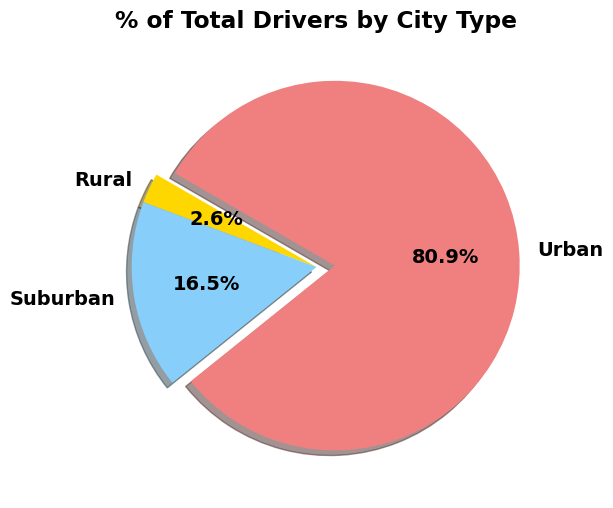

In [294]:
# Build Pie Chart with rcParams (matplotlib as mpl)
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type", weight='bold')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight']= 'bold'

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()